# Skewed distribution

##### Germain Salvato Vallverdu [germain.vallverdu@univ-pau.fr](germain.vallverdu@univ-pau.fr)

This cookbook shows how to plot a skewed distribution from the normal probability density function and its cummulative density function. You can take a look at [this wikipedia page](https://en.wikipedia.org/wiki/Skewness) giving an introduction to skewness of a distribution.

This cookbook was written from [this question](http://stackoverflow.com/questions/15400850/scipy-optimize-curve-fit-unable-to-fit-shifted-skewed-gaussian-curve) on stackexchange.

### import modules and setup

In [1]:
%pylab --no-import-all inline

from scipy.special import erf
from scipy.optimize import curve_fit

matplotlib.rcParams["figure.figsize"] = (10, 6)
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams["font.family"] = "sans"
matplotlib.rcParams["font.size"] = 20

Populating the interactive namespace from numpy and matplotlib


### Definition of functions

The normal probability function reads 

\begin{equation}
    \text{pdf}(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(- \frac{(x - \mu)^2}{2\sigma^2} \right)
\end{equation}

In [2]:
def normpdf(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

The cummulative density function reads 

\begin{equation}
    \text{cdf}(x) = \frac{1}{2} \left[1 + \text{erf}\left(\frac{x - \mu}{\sigma\sqrt{2}} \right) \right]
\end{equation}

In [3]:
def normcdf(x, mu, sigma, alpha=1):
    return 0.5 * (1 + erf(alpha * (x - mu) / (sigma * np.sqrt(2))))

In order to add skewness to the normal probability density function, it is multiplied by the normal cummulative density function. In order to adjust the skewness of the distribution, a parameter $\alpha$ is added to the cummulative density function and we get a skewed density function which reads 

\begin{equation}
    \text{skewed}(x) = \frac{A}{2\sigma \sqrt{2\pi}} \, \exp\left(- \frac{(x - \mu)^2}{2\sigma^2} \right)
             \left[1 + \text{erf}\left(\alpha \, \frac{x - \mu}{\sigma\sqrt{2}} \right) \right]
\end{equation}

The prefactor $A$ is added for fitting purpose.

In [4]:
def skewed(x, mu, sigma, alpha, a):
    return a * normpdf(x, mu, sigma) * normcdf(x, mu, sigma, alpha)

## Plot examples

The plots below show the effect of parameter $\alpha$ in the $\text{cdf}$ part of the skewed distribution. With $\alpha$=0 we get the normal distribution.

In [57]:
ax1.set_ylabel?

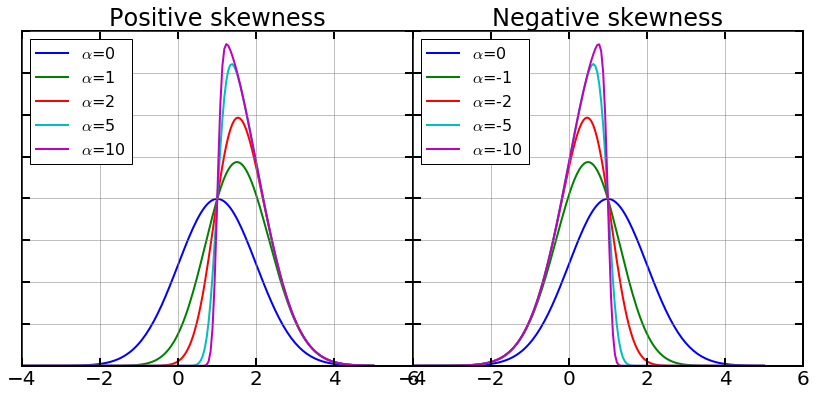

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(14, 6))
x = np.linspace(-5, 5, 200)
for alpha in [0, 1, 2, 5, 10]:
    ax1.plot(x, skewed(x, mu=1, sigma=1, alpha=alpha, a=1), label=r"$\alpha$=%d" % alpha)
ax1.set_title("Positive skewness")
ax1.legend(loc="upper left", fontsize=16)
for alpha in [0, 1, 2, 5, 10]:
    ax2.plot(x, skewed(x, mu=1, sigma=1, alpha=-alpha, a=1), label=r"$\alpha$=%d" % -alpha)
ax2.legend(loc="upper left", fontsize=16)
ax2.set_title("Negative skewness")
ax2.set_yticklabels([])
ax2.set_xlim(-4, 6)
fig.subplots_adjust(wspace=0)

## Fit to a skewed distribution

In order to fit some datas to the skewed distribution, we will use the `curve_fit` method of `scipy.optimize`.

In [6]:
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, **kw)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array
        for functions with k predictors.
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence, optional
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        can be determined using introspection, otherwise

First, compute points representing a skewed distribution with a random noise.

In [49]:
# produce data to fit
sigma = 10
mu = 50
alpha = 2
a = 1
x = np.linspace(0,100,100)

y = skewed(x, mu, sigma, alpha=alpha, a=a)
yn = y + 0.002 * np.random.normal(size=len(x))

Now, we use `curve_fit` to optimize the parameters and then plot the resulting functions.

Parameters skewed :
-------------------
mu    : 50.0876601397
sigma : 9.76673500085
alpha : 1.94006355233
a     : 0.976838902518

Parameters normal :
-------------------
mu    : 56.9087655557
sigma : 14.5346539279


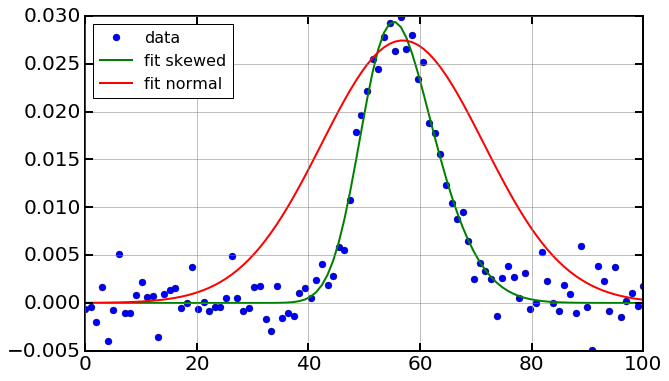

In [52]:
# fit to skewed distribution
sopt, scov = curve_fit(skewed, x, yn, p0=(20, 20, 1, 1))
y_fit= skewed(x, *sopt)

# fit to normal distribution
gopt, gcov = curve_fit(normpdf, x, yn, p0=(20, 20))
y_gfit = normpdf(x, *gopt)

# plot
#plt.plot(x, y, "r-")
plt.plot(x, yn, "bo", label="data")
plt.plot(x, y_fit, "g", label="fit skewed")
plt.plot(x, y_gfit, "r", label="fit normal")
plt.legend(loc="upper left", fontsize=16)

# parameters
print("Parameters skewed :")
print("-------------------")
print("mu    :", sopt[0])
print("sigma :", sopt[1])
print("alpha :", sopt[2])
print("a     :", sopt[3])
print("\nParameters normal :")
print("-------------------")
print("mu    :", gopt[0])
print("sigma :", gopt[1])